# Tour of Machine Learning  Classification Algorithms
- Decision Tree 
- Random Forest 
- Support Vector Machine


-- Ganesh Kasturi 22/06/2020

# Attribute Information:
- Age (age in years)
- Sex (1 = male; 0 = female)
- CP (chest pain type)
- TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
- CHOL (serum cholestoral in mg/dl)
- FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- RESTECH (resting electrocardiographic results)
- THALACH (maximum heart rate achieved)
- EXANG (exercise induced angina (1 = yes; 0 = no))
- OLDPEAK (ST depression induced by exercise relative to rest)
- SLOPE (the slope of the peak exercise ST segment)
- CA (number of major vessels (0-3) colored by flourosopy)
- THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
- TARGET (1 or 0)

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_curve,auc


In [2]:
data = pd.read_csv(r"C:\Users\ganes\Desktop\Ensemble Learning\heart.csv")

In [3]:
print("Data First 5 Rows\n")
data.head()

Data First 5 Rows



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print("Data Last 5 Rows\n")
data.tail()

Data Last 5 Rows



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print("Data Info \n ")
data.info()

Data Info 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print('Data columns \n')
data.columns

Data columns 



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data.sample(frac=0.5)   # its like to take the sample from your dataset only!!

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1


In [9]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

In [11]:
data.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [12]:
data.shape

(303, 14)

# Missing values

In [13]:
data.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

In [14]:
data.isnull().values.any()

False

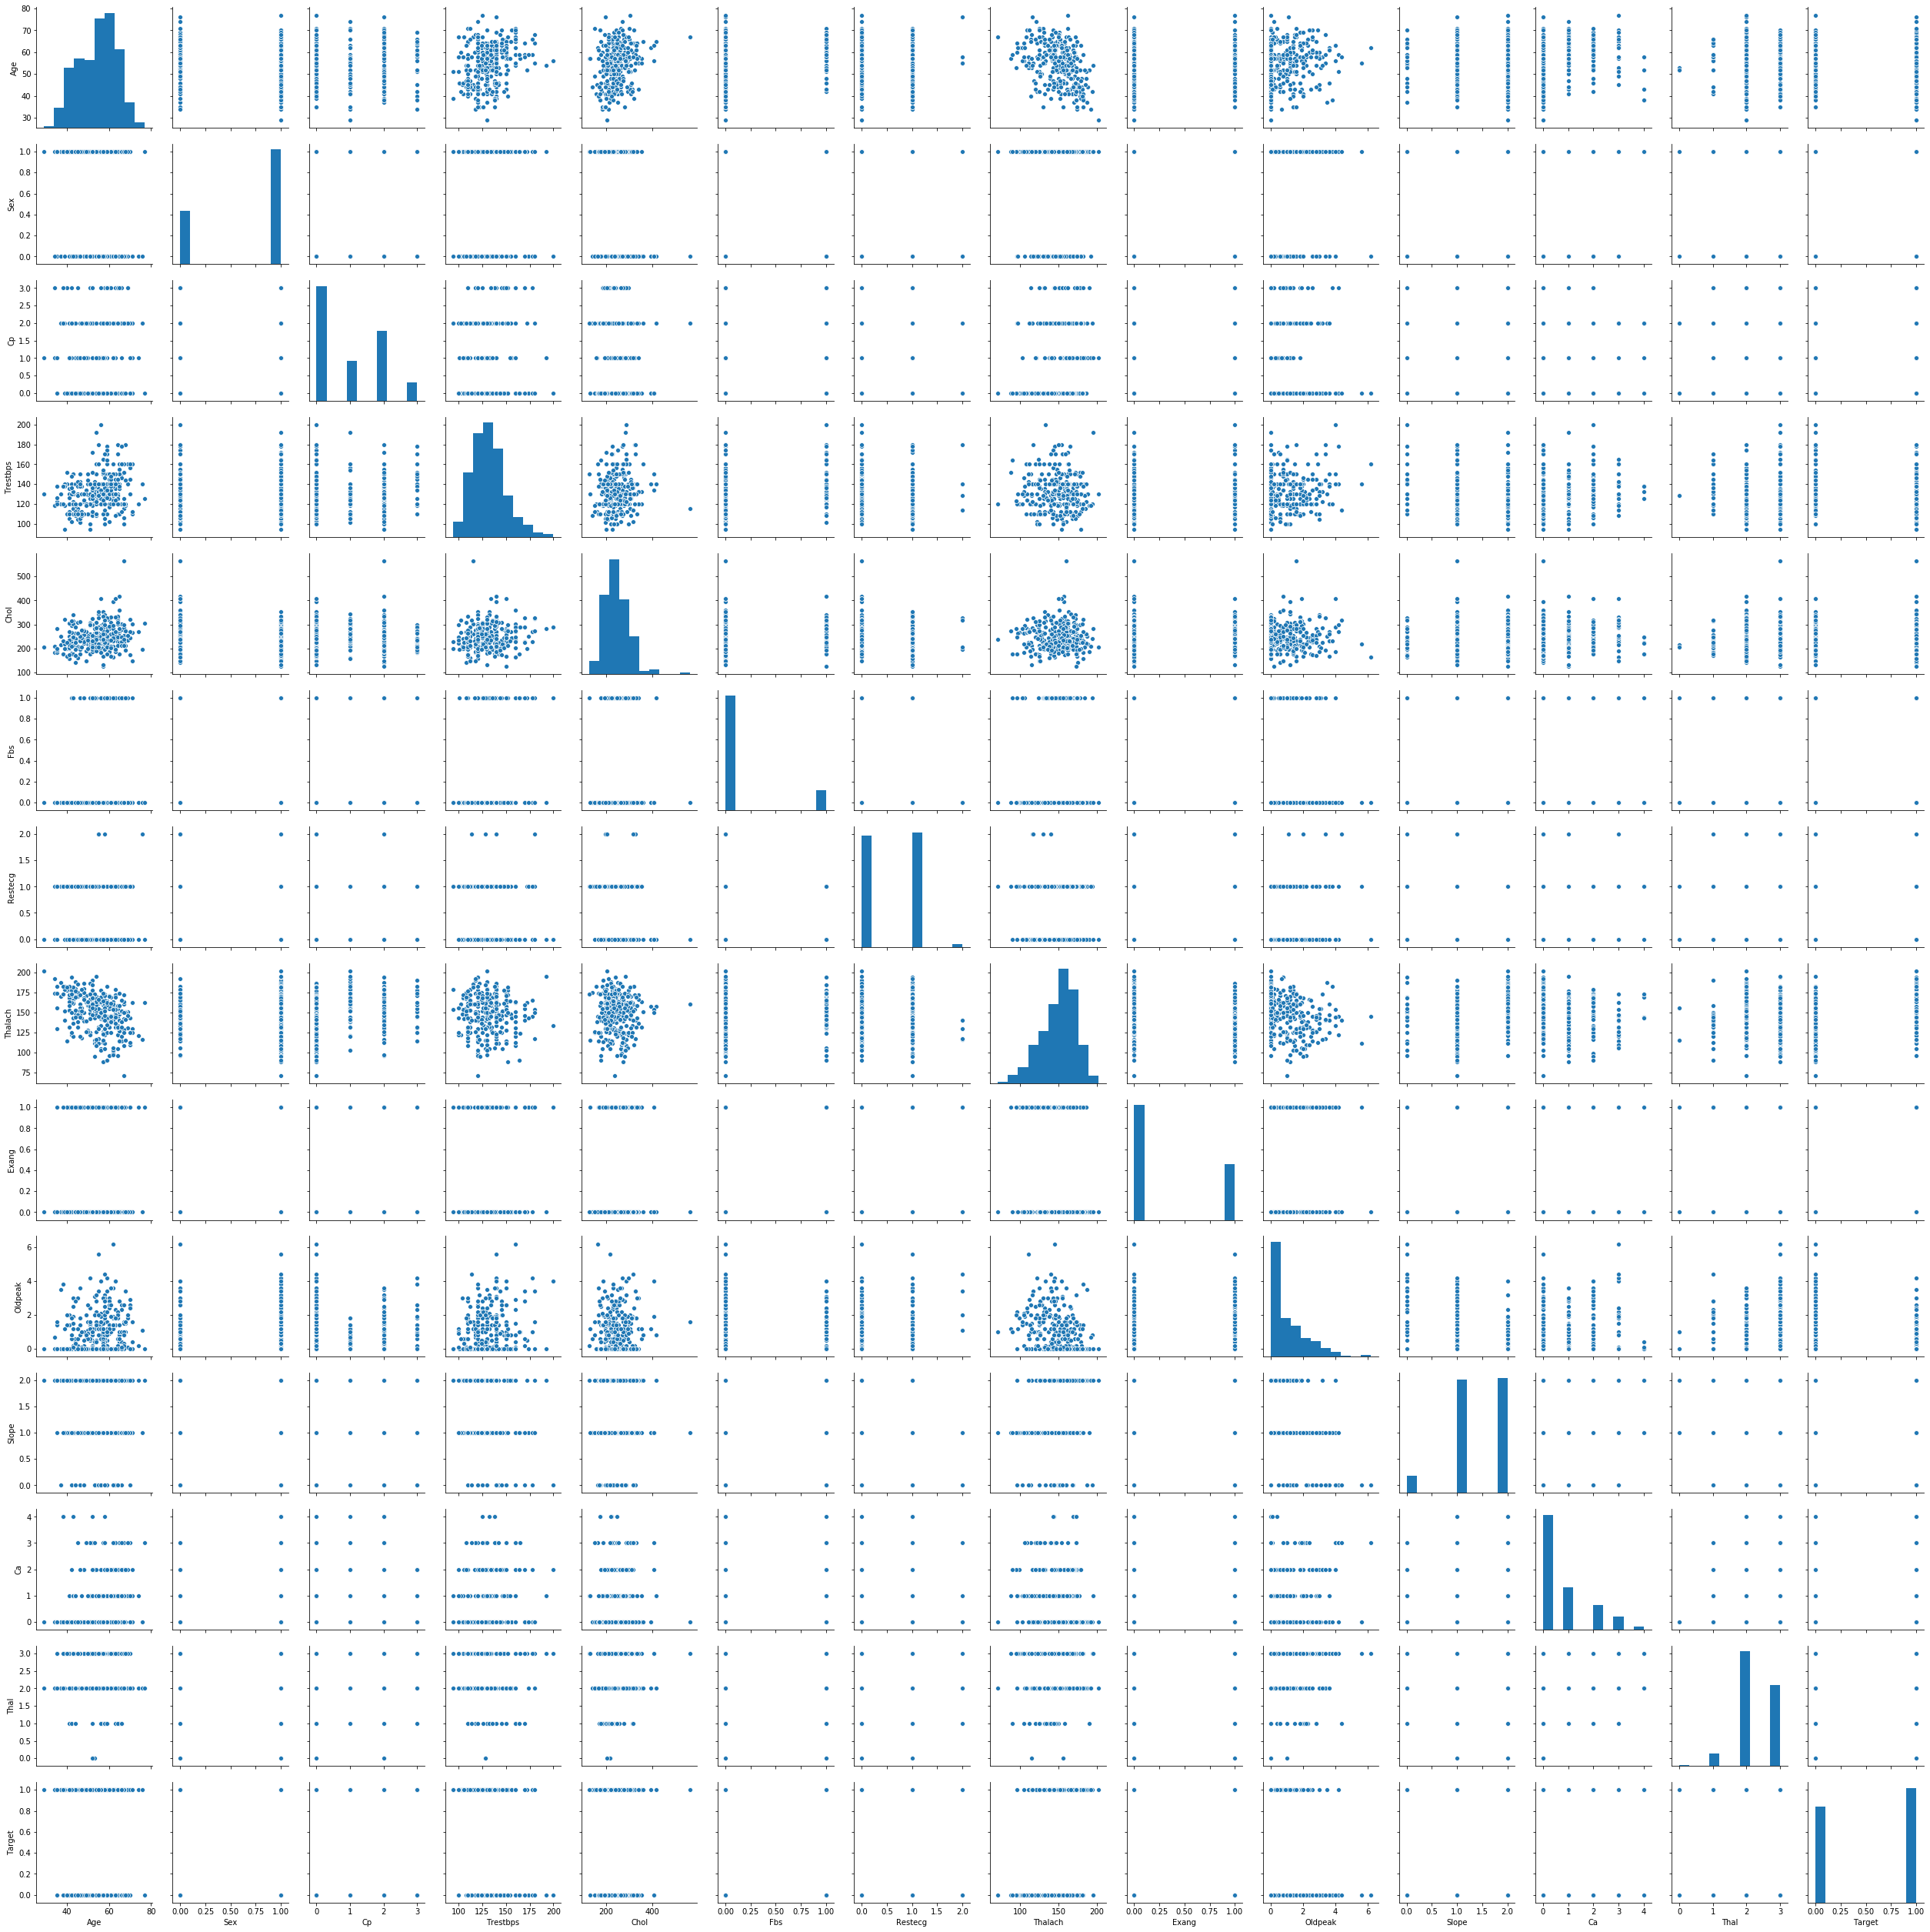

In [15]:
sns.pairplot(data)
plt.show()

### Age Analysis

In [16]:
data.Age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: Age, dtype: int64

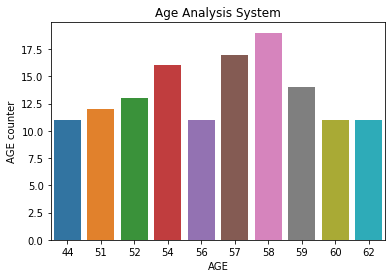

In [17]:
sns.barplot(x = data.Age.value_counts()[:10].index, y = data.Age.value_counts()[:10].values)
plt.xlabel('AGE')
plt.ylabel('AGE counter')
plt.title("Age Analysis System")
plt.show()

In [18]:
minAge = min(data.Age)
maxAge = max(data.Age)
meanAge = data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean of Age: ',meanAge)

Min Age : 29
Max Age : 77
Mean of Age:  54.366336633663366


In [19]:
young_age = data[(data.Age >=29) & (data.Age < 40)]
middle_age = data[(data.Age >=40) & (data.Age < 55)]
elderly_age = data[(data.Age > 55)]
print("Young Age Group :",len(young_age))
print("Middle Age Group :",len(middle_age))
print("Elderly Age Group :",len(elderly_age))

Young Age Group : 16
Middle Age Group : 128
Elderly Age Group : 151


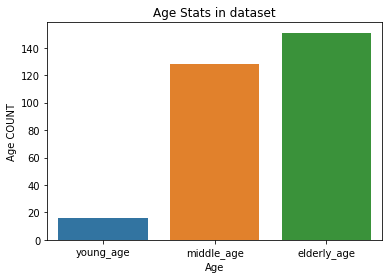

In [20]:
sns.barplot(x=['young_age','middle_age','elderly_age'],y=[len(young_age),len(middle_age),len(elderly_age)])
plt.xlabel("Age")
plt.ylabel('Age COUNT')
plt.title("Age Stats in dataset")
plt.show()

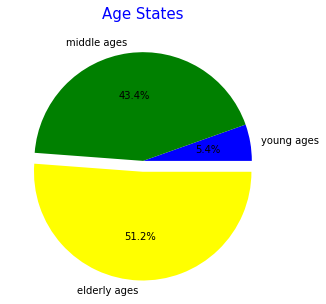

In [21]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_age),len(middle_age),len(elderly_age)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

# Sex (Gender)

In [22]:
data.Sex.value_counts()

1    207
0     96
Name: Sex, dtype: int64

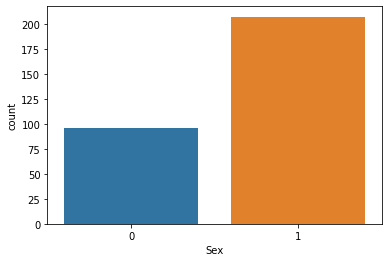

In [23]:
sns.countplot(data.Sex)
plt.show()

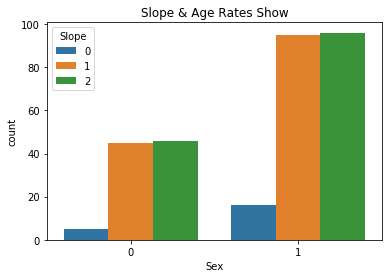

In [24]:
sns.countplot(data.Sex,hue =data.Slope)
plt.title("Slope & Age Rates Show")
plt.show()

In [25]:
total_gender_count = len(data.Sex)
male_count = len(data[data['Sex']==1])
female_count = len(data[data['Sex']==0])
print('Total Genders :',total_gender_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 303
Male Count    : 207
Female Count  : 96


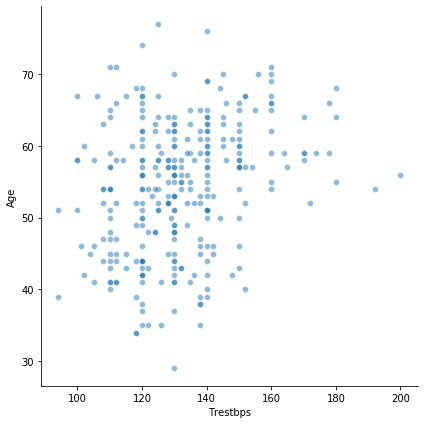

In [26]:
# # Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Trestbps", y="Age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

# Chest Pain Type

In [27]:
data.Cp.value_counts()

0    143
2     87
1     50
3     23
Name: Cp, dtype: int64

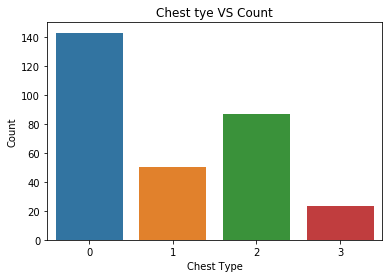

In [28]:
sns.countplot(data.Cp)
plt.xlabel("Chest Type")
plt.ylabel("Count")
plt.title("Chest tye VS Count")
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

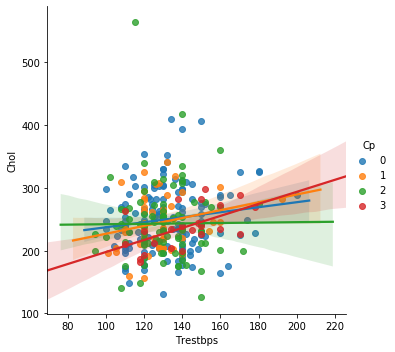

In [29]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Trestbps", y="Chol",data=data,hue="Cp")
plt.show()

In [30]:
data.Thalach.value_counts()[:10]

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
Name: Thalach, dtype: int64

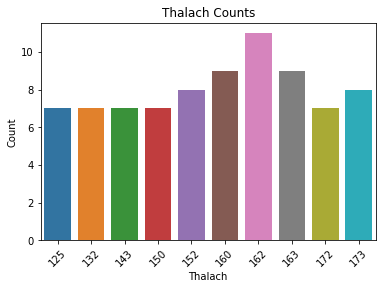

In [31]:
sns.barplot(x = data.Thalach.value_counts()[:10].index,y= data.Thalach.value_counts()[:10].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()


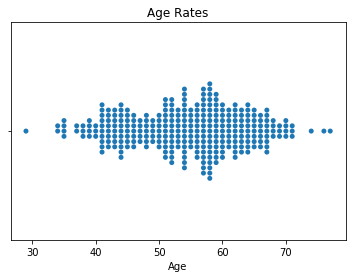

In [32]:
sns.swarmplot(x =data.Age)
plt.title('Age Rates')
plt.show()

# Thal Analysis
3 = normal; 6 = fixed defect; 7 = reversable defect

In [33]:
data.Thal.value_counts()

2    166
3    117
1     18
0      2
Name: Thal, dtype: int64

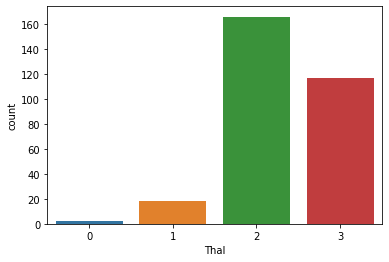

In [34]:
sns.countplot(data.Thal)
plt.show()

# Target Analysis


In [35]:
data.Target.unique()

array([1, 0], dtype=int64)

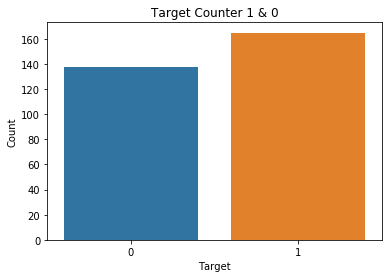

In [36]:
sns.countplot(data.Target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counter 1 & 0')
plt.show()

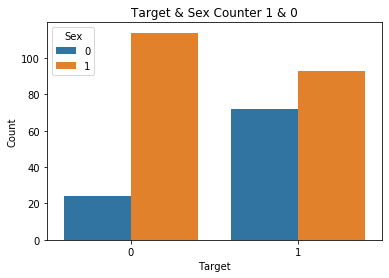

In [37]:
sns.countplot(data.Target,hue =data.Sex)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target & Sex Counter 1 & 0')
plt.show()

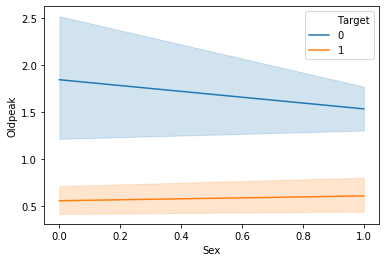

In [38]:
sns.lineplot(x= 'Sex',y='Oldpeak',hue= 'Target',data =data)
plt.show()

# Data Preparation (Train/test Split)

In [39]:
X=data.drop('Target',axis=1)
y=data['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify = y,random_state =123)

print('X_train Shape : ',X_train.shape)
print('X_test Shape : ',X_test.shape)

X_train Shape :  (227, 13)
X_test Shape :  (76, 13)


# Data Standardization

In [40]:
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,auc
from matplotlib.colors import ListedColormap
import warnings; warnings.filterwarnings('ignore')

# Function IMP 

In [42]:
def run_classifier(clf,param_grid,title):
    # ------------------------------------------------------------------------------
    cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=123)
    # Randomized grid Search
    n_iter_search = 10
    gs = RandomizedSearchCV(clf,
                           param_distributions=param_grid,
                           n_iter= n_iter_search,
                           cv = cv,
                           iid= False,
                           scoring ='accuracy')
    # Train model
    gs.fit(X_train, y_train)  
    print("The best parameters are %s" % (gs.best_params_)) 
    # Predict on test set
    y_pred = gs.best_estimator_.predict(X_test)
    # Get Probability estimates
    y_prob = gs.best_estimator_.predict_proba(X_test)[:, 1]
    # -----------------------------------------------------
    print('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_pred)*100))  
    print('Precision score: %.2f%%' % (precision_score(y_test, y_pred)*100))
    print('Recall score: %.2f%%' % (recall_score(y_test, y_pred)*100))
    # ----------------------------------------------------- 
    fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(21, 7))
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
    ax1.set_title("Confusion Matrix")
    ax1.set_xlabel("Predicted class")
    ax1.set_ylabel("Actual class")
    fig.tight_layout()
    # -----------------------------------------------------
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    ax2.plot(fpr, tpr, lw = 2, label = 'AUC: {:.2f}'.format(auc(fpr, tpr)))
    ax2.plot([0, 1], [0, 1],
             linestyle = '--',
             color = (0.6, 0.6, 0.6),
             label = 'Random guessing')
    ax2.plot([0, 0, 1], [0, 1, 1],
             linestyle = ':',
             color = 'black', 
             label = 'Perfect performance')
    ax2.set_xlim([-0.05, 1.05])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate (FPR)')
    ax2.set_ylabel('True Positive Rate (TPR)')
    ax2.set_title('Receiver Operator Characteristic (ROC) Curve')
    ax2.legend(loc = "lower right")
    fig.tight_layout()      
    # -----------------------------------------------------
    

# Linear SVM

The best parameters are {'gamma': 0.01, 'C': 10.0}
Accuracy score: 85.53%
Precision score: 84.09%
Recall score: 90.24%


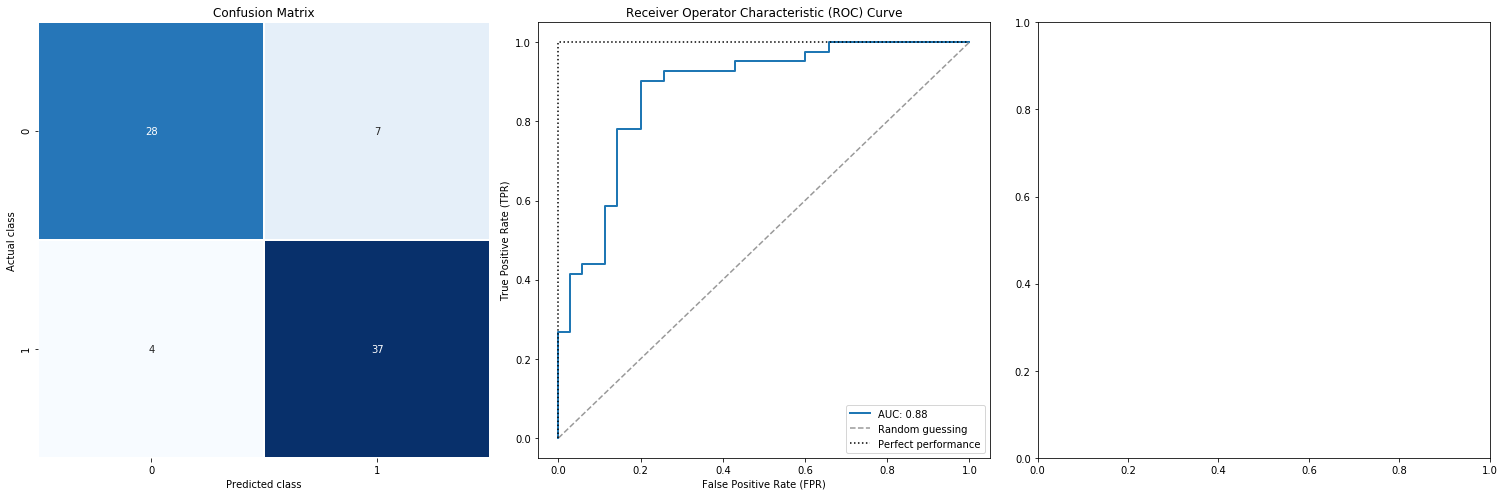

In [43]:
from sklearn.svm import SVC
svm_linear = SVC(kernel="linear",probability=True)
param_grid = {'gamma':np.logspace(-2,2,5),
             'C':np.logspace(-2,2,5)}
run_classifier(svm_linear,param_grid,'Linear SVM')

# DecisionTree

The best parameters are {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 19, 'criterion': 'entropy'}
Accuracy score: 71.05%
Precision score: 74.36%
Recall score: 70.73%


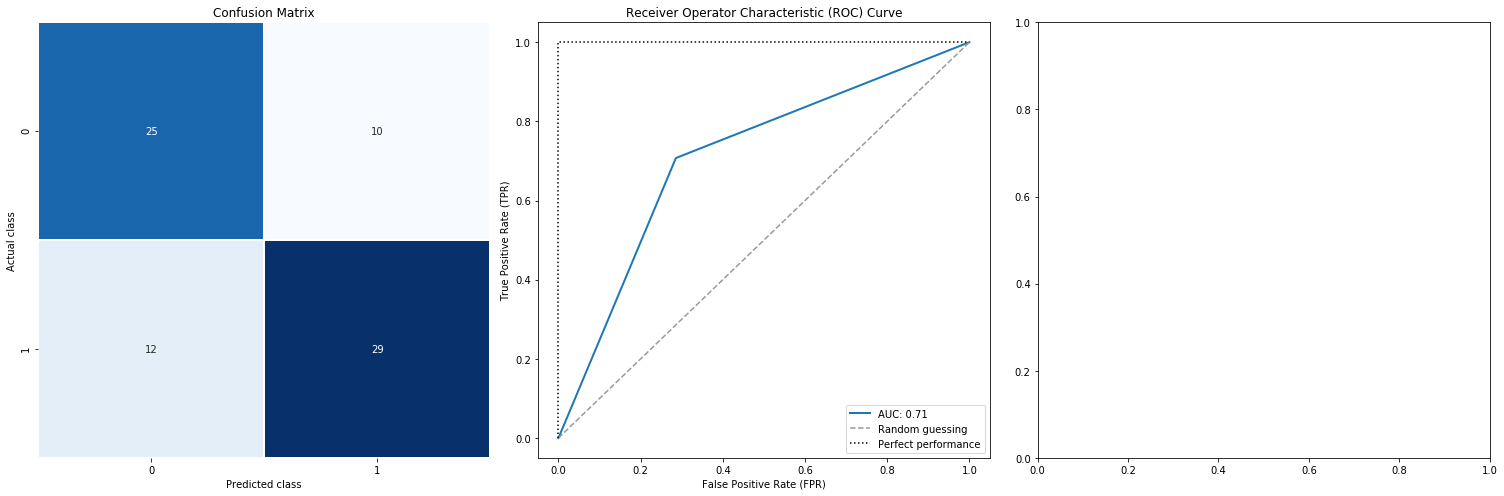

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': np.arange(1, 20, 2),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'max_features': ['auto', 'sqrt', 'log2', None]}

run_classifier(dtree, param_grid, "Decision Tree")

# RBF SVM

The best parameters are {'gamma': 0.01, 'C': 1.0}
Accuracy score: 80.26%
Precision score: 77.08%
Recall score: 90.24%


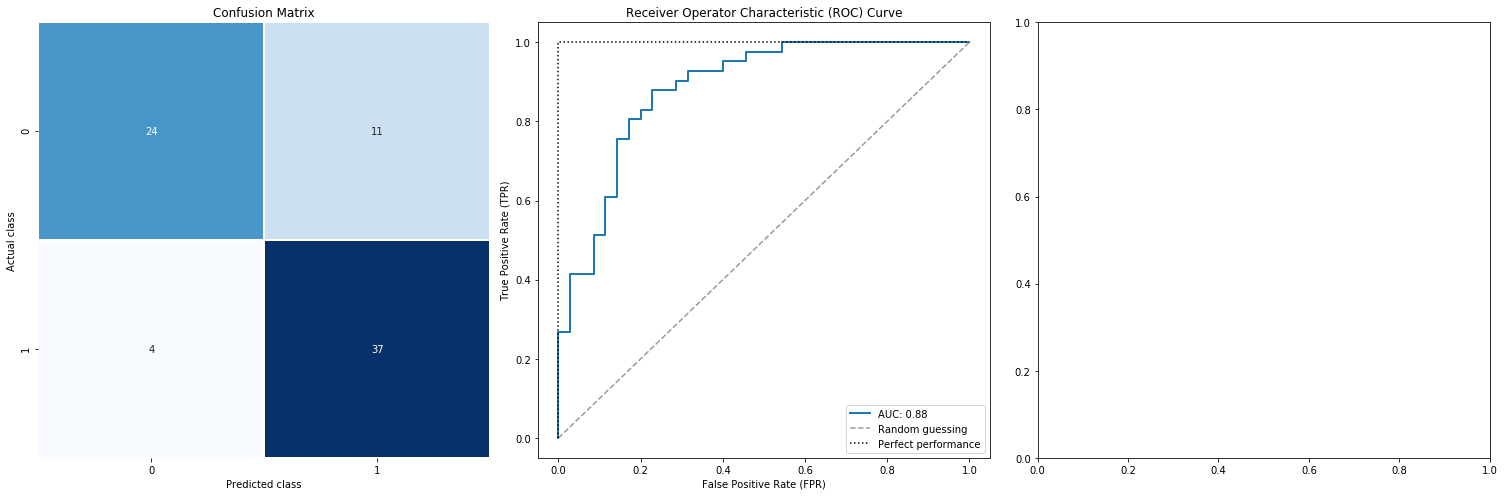

In [45]:
svm_rbf = SVC(kernel="rbf", probability=True)

param_grid = {'gamma': np.logspace(-2, 2, 5),
              'C': np.logspace(-2, 2, 5)}

run_classifier(svm_rbf, param_grid, "RBF SVM")

# Random Forest Classifier

The best parameters are {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Accuracy score: 82.89%
Precision score: 81.82%
Recall score: 87.80%


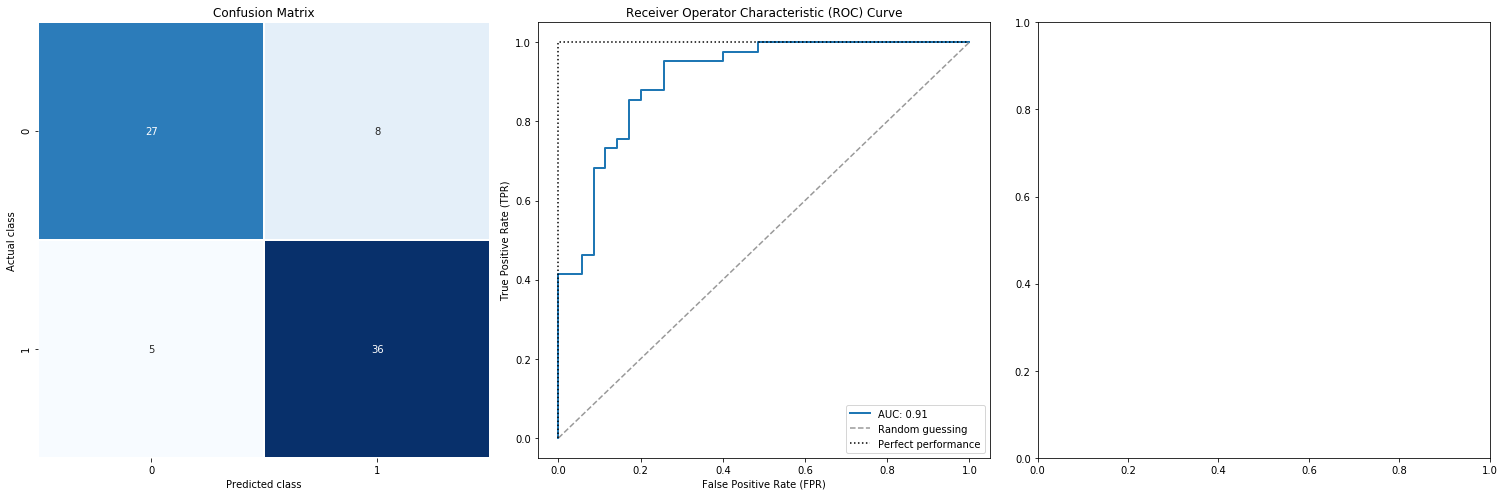

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = {'n_estimators': [100, 200],
              'max_depth': [10, 20, 100, None],
              'max_features': ['auto', 'sqrt', None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

run_classifier(rf, param_grid, 'Random Forest')

 # Navie Bayes 

The best parameters are {'priors': None}
Accuracy score: 78.95%
Precision score: 79.07%
Recall score: 82.93%


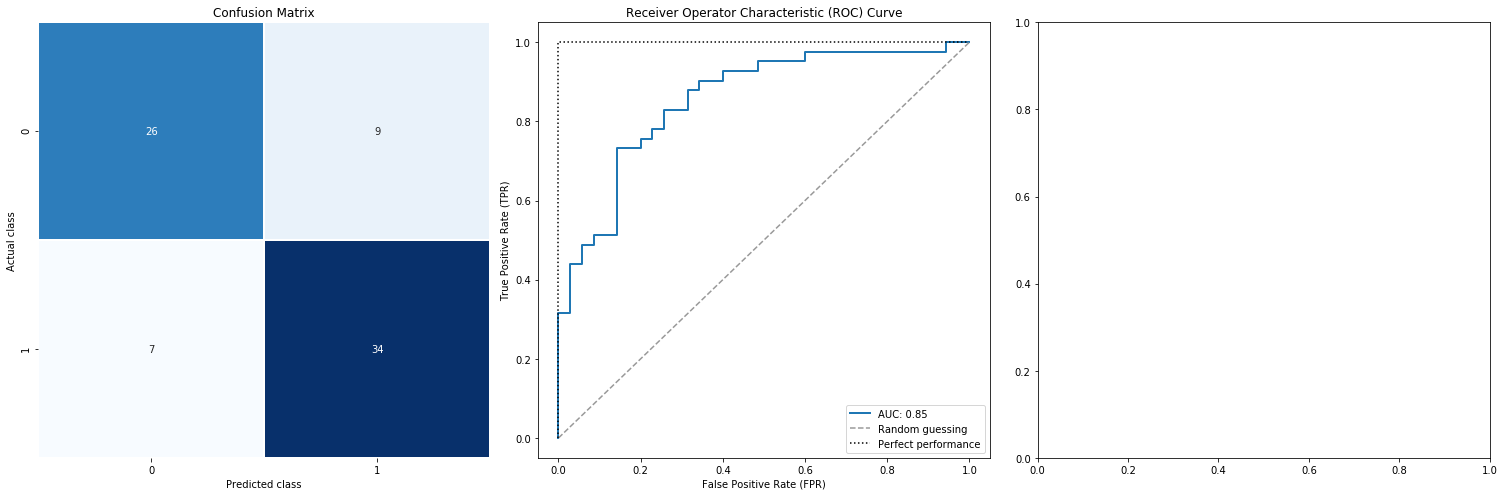

In [47]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

param_grid = {'priors': [None]}

run_classifier(nb, param_grid, 'Naive Bayes')

# Logistic Regression

The best parameters are {'solver': 'newton-cg', 'penalty': 'l2'}
Accuracy score: 84.21%
Precision score: 83.72%
Recall score: 87.80%


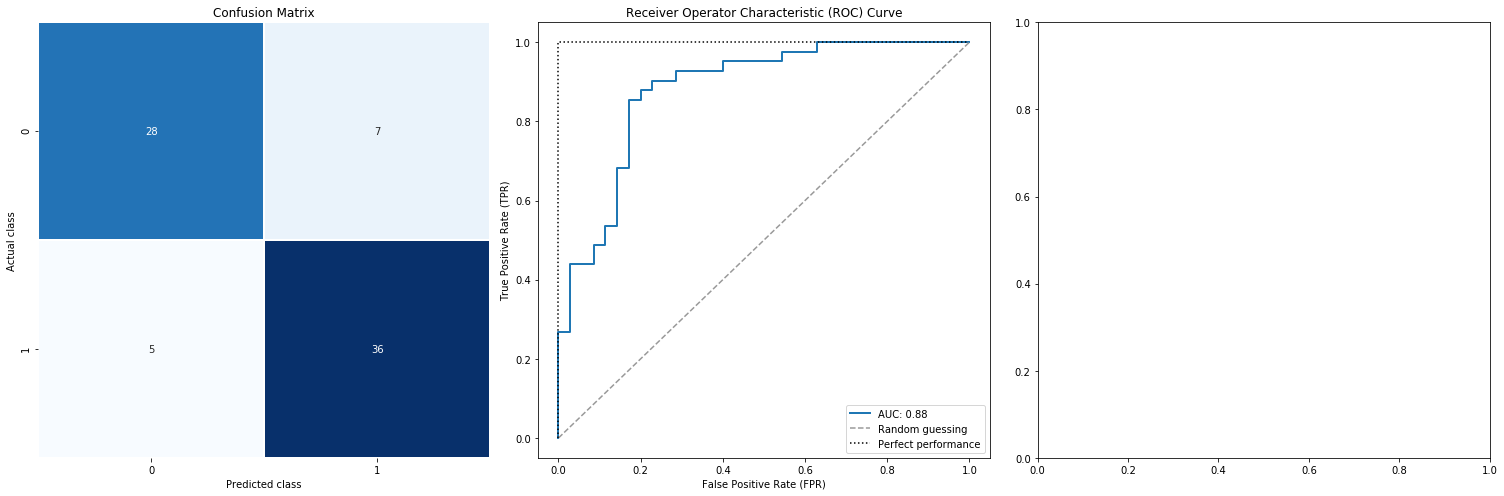

In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

param_grid = {'penalty': ['l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

run_classifier(lr, param_grid, 'Logistic Regression')

# MLPClassifier

The best parameters are {'solver': 'lbfgs', 'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50), 'alpha': 10.0, 'activation': 'relu'}
Accuracy score: 82.89%
Precision score: 81.82%
Recall score: 87.80%


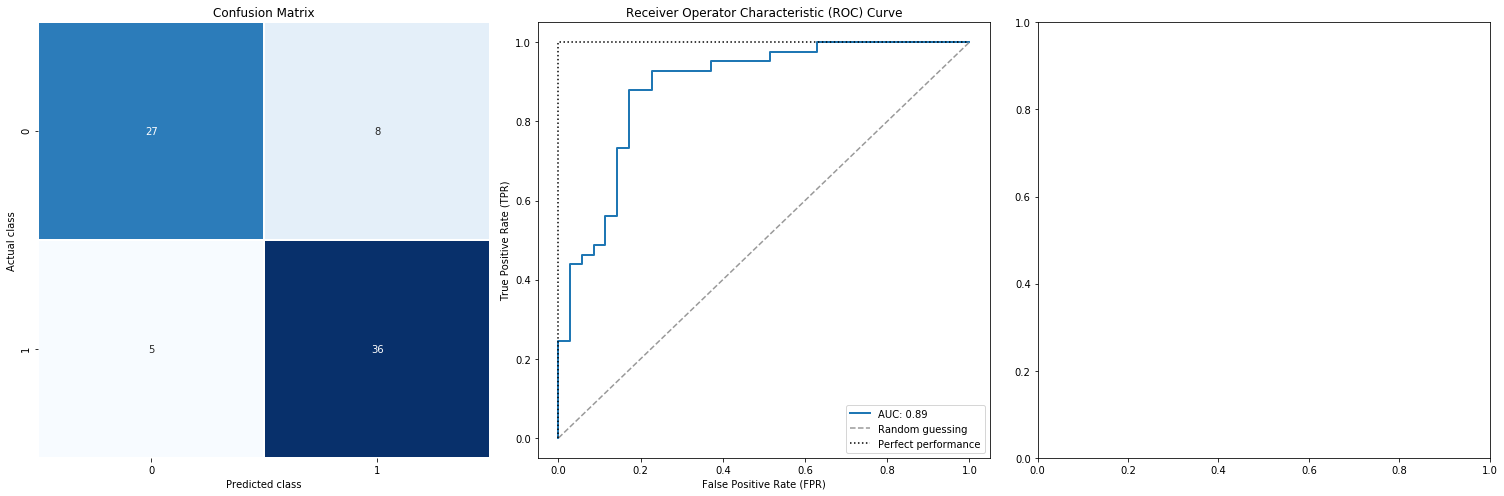

In [49]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

param_grid = {'hidden_layer_sizes': [(10,), (50,), (10, 10), (50, 50)],
             'activation': ['identity', 'logistic', 'tanh', 'relu'],
             'solver': ['lbfgs', 'sgd', 'adam'],
             'alpha': np.logspace(-5, 3, 5),
             'learning_rate': ['constant', 'invscaling','adaptive'],
             'max_iter': [100, 500, 1000]}

run_classifier(mlp, param_grid, 'Neural Net')